In [7]:
import numpy as np
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class DiabetesDataset(Dataset):
    def __init__(self,filepath):
        xy = np.loadtxt(filepath,delimiter=',',dtype = np.float32)
        self.x_data = torch.from_numpy(xy[:,:-1])
        self.y_data = torch.from_numpy(xy[:,[-1]])
        self.len = xy.shape[0]
        
    def __getitem__(self,index):
        return self.x_data[index],self.y_data[index]
    
    def __len__(self):
        return self.len
    
dataset = DiabetesDataset('diabetes.csv')
train_loader = DataLoader(dataset = dataset, batch_size = 32, shuffle = True,num_workers = 0)

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8,6)
        self.linear2 = torch.nn.Linear(6,4)
        self.linear3 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x
    
model = Model()

criterion = torch.nn.BCELoss(reduction = 'mean')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
i_list = []
lossitem_list = []
if __name__ == '__main__':
    for epoch in range(100):
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            y_pred = model(inputs)
            loss = criterion(y_pred, labels)
            print(epoch, i, loss.item())
            i_list.append(i)
            lossitem_list.append(loss.item())
            
            optimizer.zero_grad()
            loss.backward()
            
            optimizer.step()

0 0 0.7119196653366089
0 1 0.6997897028923035
0 2 0.6968518495559692
0 3 0.6939895153045654
0 4 0.7042943239212036
0 5 0.6996345520019531
0 6 0.6993476152420044
0 7 0.6958847045898438
0 8 0.7031315565109253
0 9 0.6992524862289429
0 10 0.6942459344863892
0 11 0.6977686882019043
0 12 0.6950407028198242
0 13 0.6942000985145569
0 14 0.6955093145370483
0 15 0.6948922872543335
0 16 0.6935306191444397
0 17 0.6931055188179016
0 18 0.692231297492981
0 19 0.6921625137329102
0 20 0.6915773153305054
0 21 0.6910936832427979
0 22 0.6903125643730164
0 23 0.6911330223083496
1 0 0.6889029741287231
1 1 0.6898345947265625
1 2 0.6898511648178101
1 3 0.6913831830024719
1 4 0.694119393825531
1 5 0.6882463693618774
1 6 0.6842067837715149
1 7 0.6880089640617371
1 8 0.6850152611732483
1 9 0.6844630241394043
1 10 0.6873892545700073
1 11 0.6833398938179016
1 12 0.6942952275276184
1 13 0.6864724159240723
1 14 0.6939966082572937
1 15 0.6863910555839539
1 16 0.6796216368675232
1 17 0.671997606754303
1 18 0.68070507

14 16 0.6292046308517456
14 17 0.6621928215026855
14 18 0.7282291650772095
14 19 0.5639464259147644
14 20 0.6454185247421265
14 21 0.6952473521232605
14 22 0.7114341259002686
14 23 0.6024506092071533
15 0 0.6453846096992493
15 1 0.6951298713684082
15 2 0.629431962966919
15 3 0.6952264308929443
15 4 0.6948839426040649
15 5 0.6294236779212952
15 6 0.6292322874069214
15 7 0.6785005331039429
15 8 0.5636208057403564
15 9 0.5960172414779663
15 10 0.6788204312324524
15 11 0.6451557874679565
15 12 0.6456566452980042
15 13 0.6792341470718384
15 14 0.6287916302680969
15 15 0.6287285089492798
15 16 0.6954452991485596
15 17 0.5119898915290833
15 18 0.678970992565155
15 19 0.6122708320617676
15 20 0.6284792423248291
15 21 0.6962465047836304
15 22 0.6960209012031555
15 23 0.6474671363830566
16 0 0.7633553743362427
16 1 0.544568657875061
16 2 0.6454602479934692
16 3 0.6116188168525696
16 4 0.7130743265151978
16 5 0.6453846096992493
16 6 0.6284772753715515
16 7 0.6622007489204407
16 8 0.67895090579986

33 10 0.722090482711792
33 11 0.6825544834136963
33 12 0.5858955979347229
33 13 0.6247348189353943
33 14 0.6246607303619385
33 15 0.6439726948738098
33 16 0.5664067268371582
33 17 0.7221155166625977
33 18 0.7029134035110474
33 19 0.5665300488471985
33 20 0.7220252156257629
33 21 0.6639000773429871
33 22 0.5470413565635681
33 23 0.7009004354476929
34 0 0.6635363698005676
34 1 0.5081817507743835
34 2 0.6636585593223572
34 3 0.565563976764679
34 4 0.6046684980392456
34 5 0.624427318572998
34 6 0.6046347618103027
34 7 0.6639131307601929
34 8 0.5847246050834656
34 9 0.6835265159606934
34 10 0.723128080368042
34 11 0.6442579627037048
34 12 0.6636068820953369
34 13 0.6836743354797363
34 14 0.6437789797782898
34 15 0.6636001467704773
34 16 0.6637187004089355
34 17 0.7422193288803101
34 18 0.624552309513092
34 19 0.6831437349319458
34 20 0.5858355164527893
34 21 0.6634878516197205
34 22 0.6246647238731384
34 23 0.7556303143501282
35 0 0.6636174321174622
35 1 0.6052371263504028
35 2 0.6635361313

51 22 0.6439271569252014
51 23 0.6466773748397827
52 0 0.6838921904563904
52 1 0.6046210527420044
52 2 0.703827977180481
52 3 0.6439349055290222
52 4 0.5847203135490417
52 5 0.6042534112930298
52 6 0.5842293500900269
52 7 0.6640557050704956
52 8 0.584093451499939
52 9 0.6436504125595093
52 10 0.7039335370063782
52 11 0.6639853715896606
52 12 0.6840957999229431
52 13 0.6238808631896973
52 14 0.6639167070388794
52 15 0.6638270020484924
52 16 0.6044192314147949
52 17 0.7433782815933228
52 18 0.6048638820648193
52 19 0.6042579412460327
52 20 0.6439788937568665
52 21 0.664034903049469
52 22 0.7035430669784546
52 23 0.6188341379165649
53 0 0.5643805861473083
53 1 0.6435012221336365
53 2 0.7038161754608154
53 3 0.6439912915229797
53 4 0.6838167905807495
53 5 0.68361496925354
53 6 0.6247409582138062
53 7 0.703448474407196
53 8 0.6636256575584412
53 9 0.6834716796875
53 10 0.6444608569145203
53 11 0.564926266670227
53 12 0.6441503763198853
53 13 0.6042476892471313
53 14 0.6641015410423279
53 15

70 13 0.5846052169799805
70 14 0.6242202520370483
70 15 0.6837091445922852
70 16 0.6440070867538452
70 17 0.624248206615448
70 18 0.7035619020462036
70 19 0.7432242631912231
70 20 0.6042653918266296
70 21 0.6240351796150208
70 22 0.6639366745948792
70 23 0.7018634676933289
71 0 0.6639065146446228
71 1 0.6639387011528015
71 2 0.5649304389953613
71 3 0.6438432335853577
71 4 0.6243042349815369
71 5 0.6041561365127563
71 6 0.7038297653198242
71 7 0.6041406393051147
71 8 0.6441013216972351
71 9 0.6240955591201782
71 10 0.6441536545753479
71 11 0.6635390520095825
71 12 0.5646859407424927
71 13 0.5640296936035156
71 14 0.6640335321426392
71 15 0.6844000816345215
71 16 0.6443157196044922
71 17 0.6237444877624512
71 18 0.6835718750953674
71 19 0.7237674593925476
71 20 0.6837267279624939
71 21 0.6641523838043213
71 22 0.6837330460548401
71 23 0.6739285588264465
72 0 0.6240541934967041
72 1 0.6438817381858826
72 2 0.7032368779182434
72 3 0.7030884027481079
72 4 0.742498517036438
72 5 0.6830385327

90 0 0.7237993478775024
90 1 0.6041290760040283
90 2 0.6639311909675598
90 3 0.564839243888855
90 4 0.6835024952888489
90 5 0.6241529583930969
90 6 0.703486442565918
90 7 0.6833107471466064
90 8 0.6042846441268921
90 9 0.6046678423881531
90 10 0.5246893167495728
90 11 0.48418593406677246
90 12 0.6439430117607117
90 13 0.7046082019805908
90 14 0.6242045760154724
90 15 0.6442334651947021
90 16 0.6840179562568665
90 17 0.66420578956604
90 18 0.7438945174217224
90 19 0.6239578723907471
90 20 0.6835834980010986
90 21 0.6437472105026245
90 22 0.6840064525604248
90 23 0.7022315859794617
91 0 0.6837438344955444
91 1 0.5846115946769714
91 2 0.6837064623832703
91 3 0.6042236685752869
91 4 0.644090473651886
91 5 0.6238211989402771
91 6 0.6244471073150635
91 7 0.5843060612678528
91 8 0.7036197185516357
91 9 0.7035220861434937
91 10 0.6437051296234131
91 11 0.6438916325569153
91 12 0.6043082475662231
91 13 0.6243706345558167
91 14 0.6635357737541199
91 15 0.6439966559410095
91 16 0.6641157865524292

## 绘制图片

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

C:\Users\cjy\AppData\Local\Temp/ipykernel_43612/3715042453.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


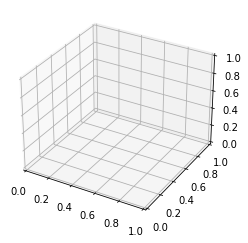

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')

In [8]:
X = np.arange(0,100,1)
Y = i_list
Z = lossitem_list
[X,Y,Z]=np.meshgrid(X,Y,Z)
plt.plot(X, Y, Z,marker='.', color='blue', linestyle='none')
plt.show()

MemoryError: Unable to allocate 4.29 GiB for an array with shape (2400, 100, 2400) and data type float64

(⊙﹏⊙)内存不够